<a href="https://colab.research.google.com/github/issatyajit/hotel-data-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Hotel Bookings.csv')

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.loc[ df['adr'] < 1, 'adr'] = np.nan

In [ ]:
df['adr'].describe()

count    117428.000000
mean        103.532575
std          49.197298
min           1.000000
25%          70.530000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
df['offspring']=df['children']+df['babies']

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#get month in number
month_num = {'January':1 ,'February':2 ,'March':3 ,'April':4 ,'May':5 ,'June':6 ,'July':7 ,'August':8 ,'September':9 ,'October':10 ,'November':11 ,'December':12}
def get_month_num(month):
  m=month_num.get(month)
  return m

In [ ]:
month_num.get(df['arrival_date_month'][0])

7

In [ ]:
df['month_num']=df['arrival_date_month'].apply(get_month_num)

In [ ]:
df['Full Date'] = df['arrival_date_day_of_month'].map(str) + '-' + df['month_num'].map(str) + '-' + df['arrival_date_year'].map(str)

In [ ]:
df['Nights spent']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,offspring,month_num,Full Date,Nights spent
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,NaN,0,0,Check-Out,2015-07-01,0.0,7,1-7-2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,NaN,0,0,Check-Out,2015-07-01,0.0,7,1-7-2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,7,1-7-2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,7,1-7-2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,0.0,7,1-7-2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,0.0,8,30-8-2017,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,0.0,8,31-8-2017,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,0.0,8,31-8-2017,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,0.0,8,31-8-2017,7


In [ ]:
def get_category(adults,offspring):
  if adults+offspring==1:
    y='Single'
  elif adults+offspring==2:
    y='Couple'
  else:
    y='Family'
  return y

In [ ]:
df['category']=df.apply(lambda x: get_category(x['adults'],x['offspring']),axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

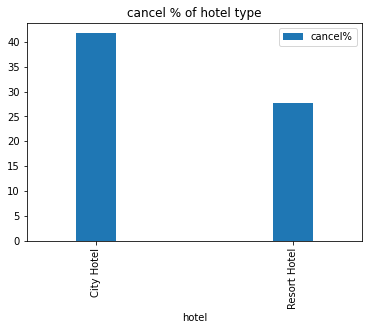

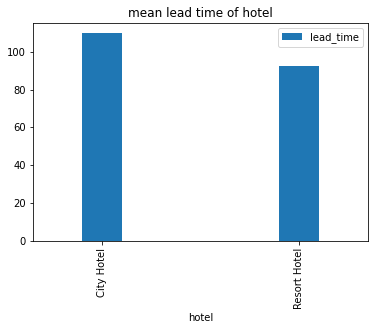

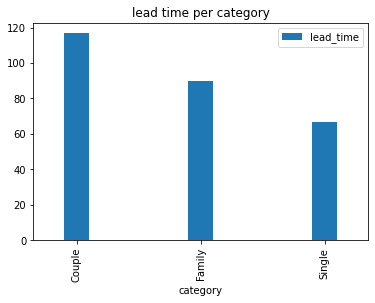

In [ ]:
df1=df[['is_canceled','hotel','lead_time']].groupby('hotel').agg({'is_canceled':'sum','lead_time':'count'}).rename(columns={'lead_time':'booking'})
df1['cancel%']=round((df1['is_canceled']/df1['booking'])*100,2)
df2=df[['lead_time','hotel']].groupby('hotel').mean('lead_time')
df3=df[['lead_time','category']].groupby('category').mean('lead_time')
df1.plot(y='cancel%',kind='bar',title='cancel % of hotel type',width=0.2,figsize=(6,4))
df2.plot(kind='bar',title='mean lead time of hotel',width=0.2,figsize=(6,4))
df3.plot(kind='bar',title='lead time per category',width=0.2,figsize=(6,4))

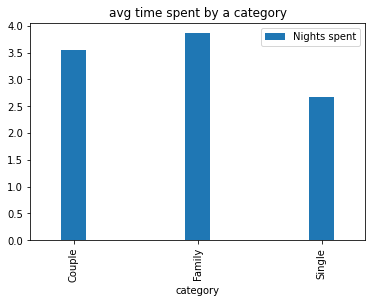

In [ ]:
df4=df[['category','Nights spent']].groupby('category').mean('Nights spent')
df4.plot(kind='bar',title='avg time spent by a category',width=0.2,figsize=(6,4))

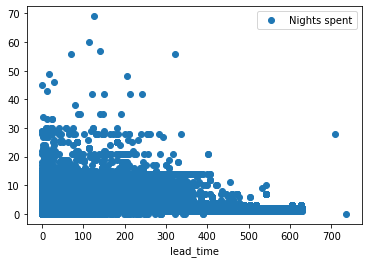

In [ ]:
#lead time analysis
df1=df[['lead_time','Nights spent']].sort_values(by=['Nights spent','lead_time'], ascending=True)
df1.plot(x='lead_time', y='Nights spent', style='o')
#obervation:most of the bookings are made in 17 days lead time and occupied for 0-20 days.

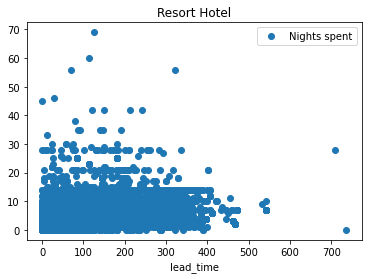

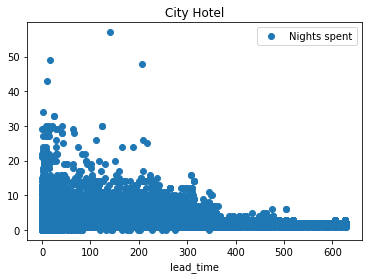

In [ ]:
#next lets find lead time vs nights spent for resort and city hotels separately
#for resprt hotel
df[df['hotel']=='Resort Hotel'][['Nights spent','lead_time']].plot(x='lead_time', y='Nights spent', style='o',title='Resort Hotel')
df[df['hotel']=='City Hotel'][['Nights spent','lead_time']].plot(x='lead_time', y='Nights spent', style='o',title='City Hotel')
#observation: People booking the hotel right before visiting are spending more time in city hotels than city hotel
#so we have realised that most people for resort hotel are booking 17 days before visiting and staying for 15 days mostly

(0.0, 550.0)

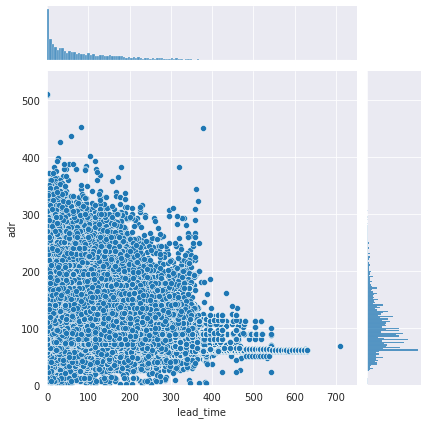

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')
plot1=sns.jointplot(x='lead_time', y='adr', data=df)
plot1.ax_marg_x.set_xlim(0, 750)
plot1.ax_marg_y.set_ylim(0, 550)
#observation: most of the customers have almost negligible lead time and price paid is around70-80 for most customers

Text(0.5, 1.0, 'Hotel : lead_time vs adr')

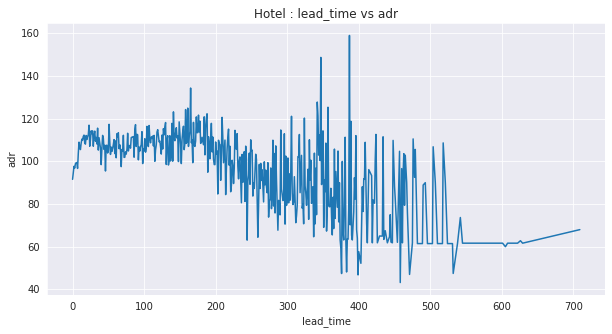

In [ ]:
#let us see the avg price for lead time
df1=df[['lead_time','adr']].dropna().groupby(['lead_time']).agg({'adr':'mean'}).sort_values(by=['lead_time'],ascending=True)
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(df1)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('Hotel : lead_time vs adr')

Text(0.5, 1.0, 'Resort Hotel : lead_time vs adr')

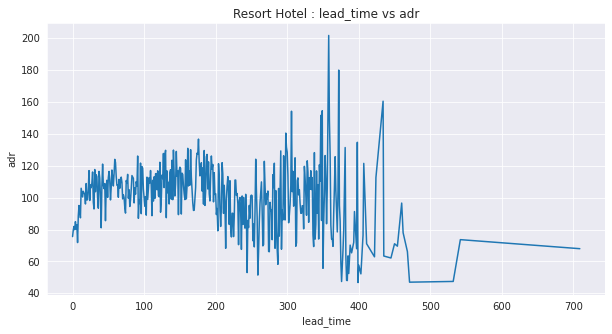

In [ ]:
df1=df[df['hotel']=='Resort Hotel'][['lead_time','adr']].dropna().sort_values(by=['lead_time'],ascending=True).groupby(['lead_time']).agg({'adr':'mean'})
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(df1)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('Resort Hotel : lead_time vs adr')

Text(0.5, 1.0, 'City Hotel : lead_time vs adr')

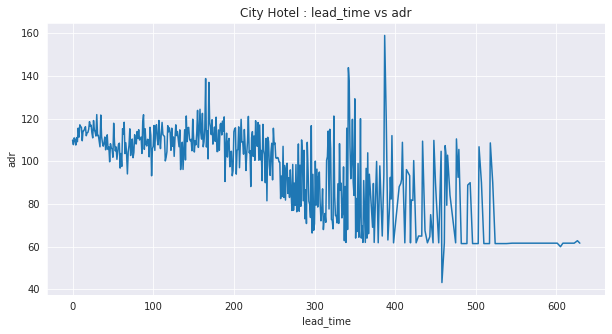

In [ ]:
df1=df[df['hotel']=='City Hotel'][['lead_time','adr']].dropna().sort_values(by=['lead_time'],ascending=True).groupby(['lead_time']).agg({'adr':'mean'})
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(df1)
plt.xlabel('lead_time')
plt.ylabel('adr')
plt.title('City Hotel : lead_time vs adr')

([<matplotlib.patches.Wedge at 0x7f762d9c43d0>,
 [Text(0.6653672192649289, 0.875948893216754, '2015'),
  Text(-1.0597723962974992, 0.29475832141918634, '2016'),
  Text(0.4063133565829729, -1.0222081276639694, '2017')])

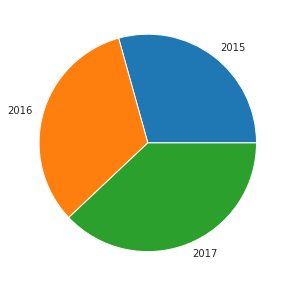

In [ ]:
#next lets see what is the average revenue generated per year and per month
df1=df[['arrival_date_year','adr']].dropna().groupby(['arrival_date_year']).agg({'adr':'mean'}).sort_values(by=['arrival_date_year'],ascending=True)
my_labels='2015','2016','2017'
plt.pie(df1['adr'],labels=my_labels)

Text(0.5, 0, 'Month')

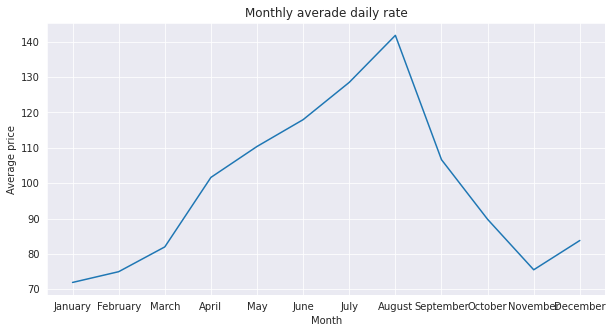

In [ ]:
#monthly adr for all hotels
df1=df[['arrival_date_month','adr']].dropna().groupby(['arrival_date_month']).agg({'adr':'mean'}).sort_values(by=['arrival_date_month'],ascending=True)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
plt.plot(df2)
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('Monthly averade daily rate')
plt.ylabel('Average price')
plt.xlabel('Month')

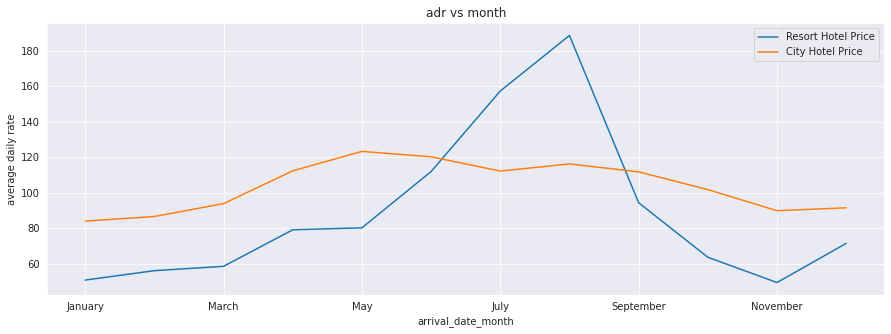

In [ ]:
#monthly adr for resorts
df3=df[df['hotel']=='Resort Hotel'][['arrival_date_month','adr']].dropna().groupby(['arrival_date_month']).agg({'adr':'mean'}).sort_values(by=['arrival_date_month'],ascending=True).reindex(new_order, axis=0)
df4=df[df['hotel']=='City Hotel'][['arrival_date_month','adr']].dropna().groupby(['arrival_date_month']).agg({'adr':'mean'}).sort_values(by=['arrival_date_month'],ascending=True).reindex(new_order, axis=0)
df3.rename(columns = {'adr':'Resort Hotel Price'}, inplace = True)
df4.rename(columns = {'adr':'City Hotel Price'}, inplace = True)
ax = df3.plot()
df4.plot(ax=ax,ylabel='average daily rate',title='adr vs month')

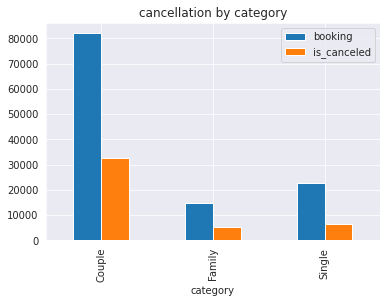

In [ ]:
df4=df[['is_canceled','category','lead_time']].groupby('category').agg({'is_canceled':'sum','lead_time':'count'}).rename(columns={'lead_time':'booking'}).reset_index()
df4.plot(x="category", y=["booking", "is_canceled"], kind="bar",title='cancellation by category',figsize=(6,4))

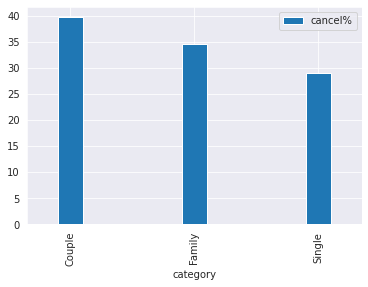

In [ ]:
df4['cancel%']=df4.apply(lambda x: (x['is_canceled']/x['booking'])*100,axis=1)
df4.plot(x='category',y='cancel%',kind='bar',width=0.2,figsize=(6,4))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


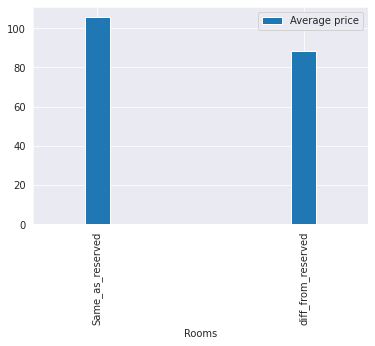

In [ ]:
df1=df.iloc[:,[19,20,27]].dropna().reset_index()
same_room_df=df1[df1['reserved_room_type']==df1['assigned_room_type']]
diff_room_df=df1[df1['reserved_room_type']!=df1['assigned_room_type']]
same_room_df.drop('index',axis=1)
diff_room_df.drop('index',axis=1)
diff_room_df.mean(axis=0)
fdf=pd.DataFrame([['Same_as_reserved',105.63],['diff_from_reserved',88.15]],columns=['Rooms','Average price'])
fdf.plot(x='Rooms',y='Average price',kind='bar',width=0.12,figsize=(6,4))

In [ ]:
df1=df.iloc[:,[19,20,27]].dropna().reset_index().drop(['index'],axis=1)

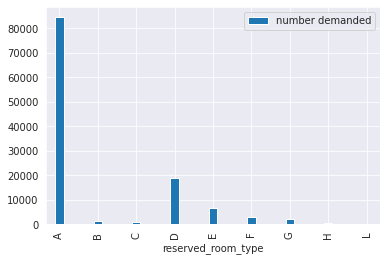

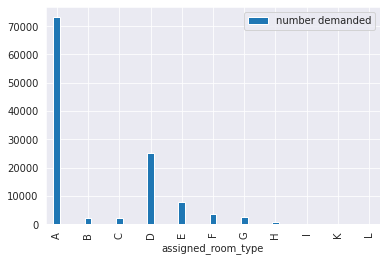

In [ ]:
#which room is most in demand
df1=df.iloc[:,[19,20,27]].dropna().reset_index().drop(['index'],axis=1)
in_demand_room_df=df1.groupby('reserved_room_type').size().reset_index()
in_demand_room_df.rename(columns={0:'number demanded'},inplace=True)
in_demand_room_df.plot(x='reserved_room_type',kind='bar',width=0.22,figsize=(6,4))
#which room people mostly get
df1=df.iloc[:,[19,20,27]].dropna().reset_index().drop(['index','reserved_room_type'],axis=1)
assigned_room_df=df1.groupby('assigned_room_type').size().reset_index()
assigned_room_df.rename(columns={0:'number demanded'},inplace=True)
assigned_room_df.plot(x='assigned_room_type',kind='bar',width=0.22,figsize=(6,4))

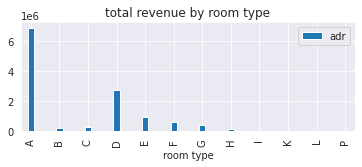

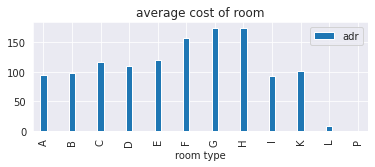

In [ ]:
#which room generates most revenue
df2=df.iloc[:,[20,27]]
df2.groupby('assigned_room_type')['adr'].sum().reset_index().plot(x='assigned_room_type',y='adr',kind='bar',xlabel='room type',title='total revenue by room type',width=0.22,figsize=(6,2))

df2.groupby('assigned_room_type')['adr'].mean().reset_index().plot(x='assigned_room_type',y='adr',kind='bar',xlabel='room type',title='average cost of room',width=0.22,figsize=(6,2))

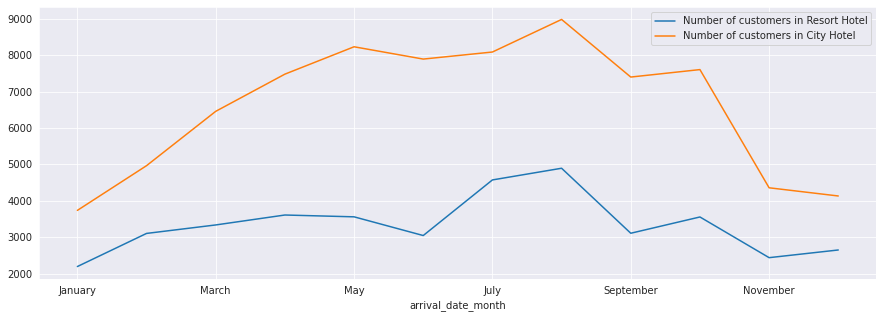

In [ ]:
#resort vs city customer count per month
#resort hotel
df1=df.iloc[:,[0,4]]
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1=df1[df1['hotel']=='Resort Hotel'].groupby('arrival_date_month').size().to_frame().reindex(new_order, axis=0)
df1.rename(columns={0:'Number of customers in Resort Hotel'},inplace=True)
ax=df1.plot()
#city hotel
df2=df.iloc[:,[0,4]]
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2=df2[df2['hotel']=='City Hotel'].groupby('arrival_date_month').size().to_frame().reindex(new_order, axis=0)
df2.rename(columns={0:'Number of customers in City Hotel'},inplace=True)
df2.plot(ax=ax)

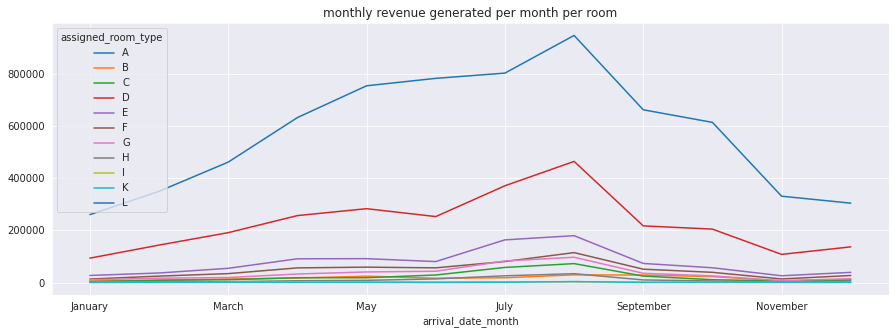

In [ ]:
df1=df.iloc[:,[20,4,27]].dropna().reset_index().drop('index',axis=1)
df1=df1.groupby(['arrival_date_month','assigned_room_type'])['adr'].sum().unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
df2.plot(title='monthly revenue generated per month per room')

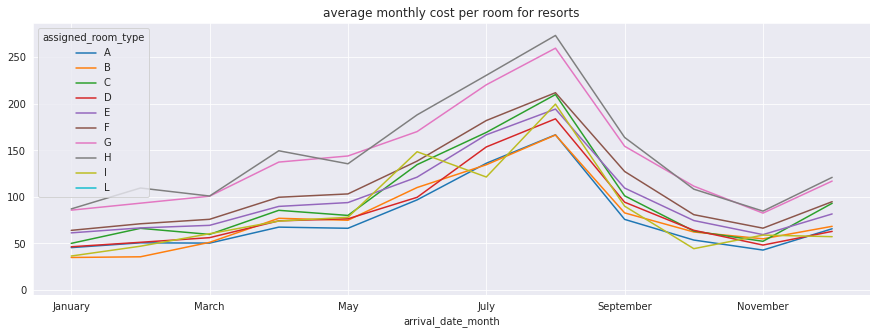

In [ ]:
df1=df.iloc[:,[0,20,4,27]]
df1=df1[df['hotel']=='Resort Hotel'].dropna().reset_index().drop('index',axis=1)
df1=df1.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
df2.plot(title='average monthly cost per room for resorts')

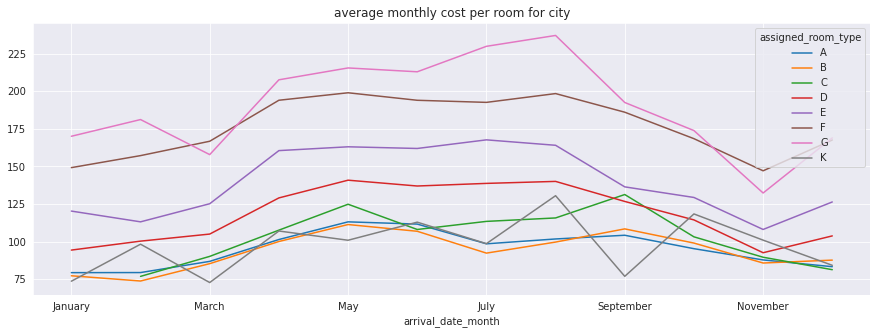

In [ ]:
df1=df.iloc[:,[0,20,4,27]]
df1=df1[df['hotel']=='City Hotel'].dropna().reset_index().drop('index',axis=1)
df1=df1.groupby(['arrival_date_month','assigned_room_type'])['adr'].mean().unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
df2.plot(title='average monthly cost per room for city')

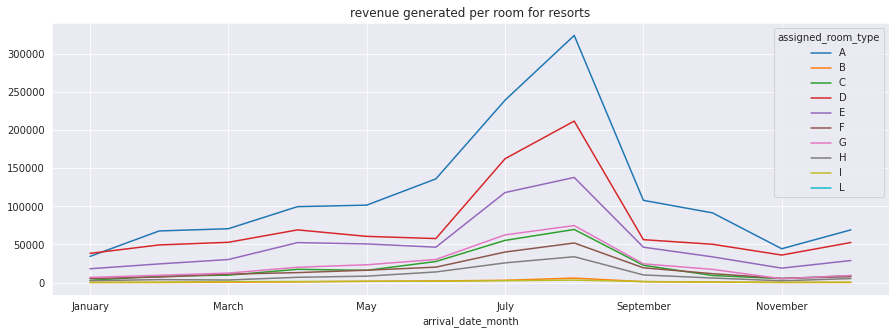

In [ ]:
df1=df.iloc[:,[0,20,4,27]]
df1=df1[df['hotel']=='Resort Hotel'].dropna().reset_index().drop('index',axis=1)
df1=df1.groupby(['arrival_date_month','assigned_room_type'])['adr'].sum().unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
df2.plot(title='revenue generated per room for resorts')

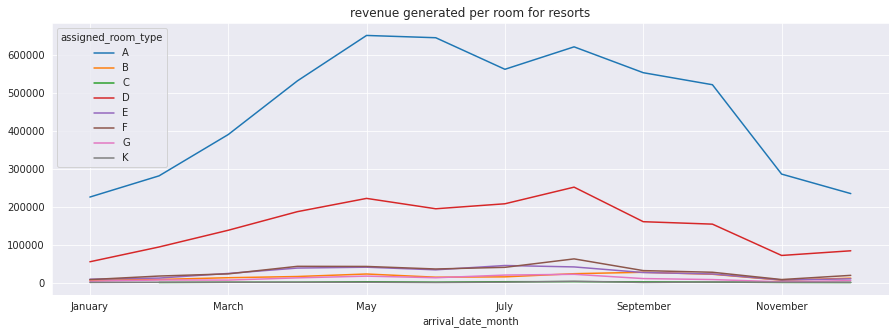

In [ ]:
df1=df.iloc[:,[0,20,4,27]]
df1=df1[df['hotel']=='City Hotel'].dropna().reset_index().drop('index',axis=1)
df1=df1.groupby(['arrival_date_month','assigned_room_type'])['adr'].sum().unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2 = df1.reindex(new_order, axis=0)
df2.plot(title='revenue generated per room for resorts')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

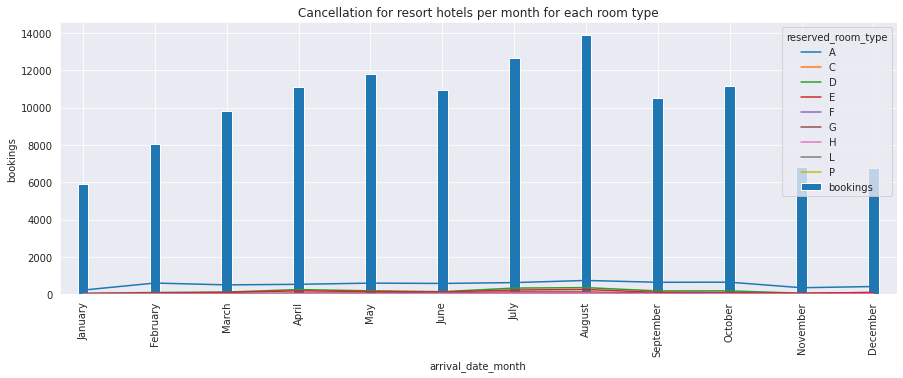

In [ ]:
#number of cancellations in which month and which room and for what hotel type
#1.Resort hoetel
df1=df.iloc[:,[0,1,4,19,20]]
df1=df1[df1['hotel']=='Resort Hotel']
df1=df1[df1['is_canceled']==1].drop('hotel',axis=1)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1=df1.groupby(['arrival_date_month','reserved_room_type'])['is_canceled'].sum().unstack().reindex(new_order, axis=0)
ax=df1.plot(kind='line',title='Cancellation for resort hotels per month for each room type')
df2=df.iloc[:,[0,4]]
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2=df2.groupby('arrival_date_month')['hotel'].size().reset_index()
df2=df2.set_index('arrival_date_month').rename(columns={'hotel':'bookings'})
df2=df2.reindex(new_order, axis=0)
df2.plot(kind='bar',ylabel='bookings',width=0.15,ax=ax)

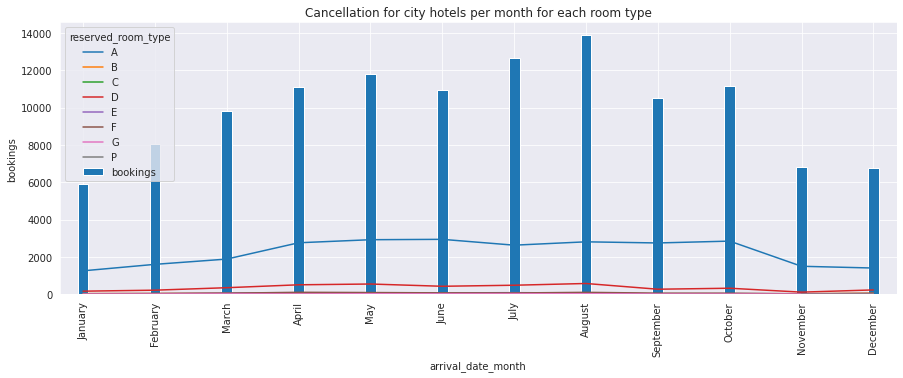

In [ ]:
df1=df.iloc[:,[0,1,4,19,20]]
df1=df1[df1['hotel']=='City Hotel']
df1=df1[df1['is_canceled']==1].drop('hotel',axis=1)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1=df1.groupby(['arrival_date_month','reserved_room_type'])['is_canceled'].sum().unstack().reindex(new_order, axis=0)
ax=df1.plot(kind='line',title='Cancellation for city hotels per month for each room type')
df2=df.iloc[:,[0,4]]
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2=df2.groupby('arrival_date_month')['hotel'].size().reset_index()
df2=df2.set_index('arrival_date_month').rename(columns={'hotel':'bookings'})
df2=df2.reindex(new_order, axis=0)
df2.plot(kind='bar',ylabel='bookings',width=0.15,ax=ax)

<BarContainer object of 2 artists>

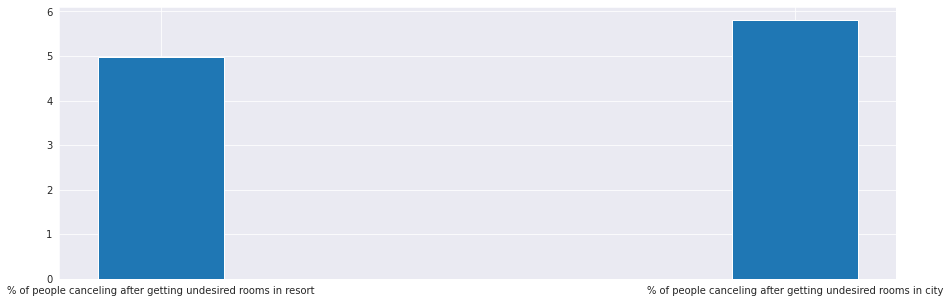

In [ ]:
#percentage of people cancelling because of not getting same room
df1=df.iloc[:,[0,1,19,20]]
#resort hotel
df1_r=df1[df1['hotel']=='Resort Hotel']
df1_r=df1_r[df1_r['reserved_room_type']!=df1_r['assigned_room_type']] #customers who did not get the same room as desired
percent_resort_undesired_cancel=round((df1_r['is_canceled'].sum()/7725)*100,2)
#city hotel
df1_c=df1[df1['hotel']=='City Hotel']
df1_c=df1_c[df1_c['reserved_room_type']!=df1_c['assigned_room_type']] #customers who did not get the same room as desired
percent_city_undesired_cancel=round((df1_c['is_canceled'].sum()/7192)*100,2)
percent_city_undesired_cancel
#plottin the result
x = ["% of people canceling after getting undesired rooms in resort", "% of people canceling after getting undesired rooms in city"]
y = [percent_resort_undesired_cancel,percent_city_undesired_cancel]
plt.bar(x,y,width=0.2)

In [ ]:
#when people not getting same room are cancelling for resort per month
df1=df.iloc[:,[0,1,4,19,20,34]]
df1=df1[df1['hotel']=='Resort Hotel']
df1=df1[df1['reserved_room_type']!=df1['assigned_room_type']].drop(['reserved_room_type','assigned_room_type','hotel'],axis=1)
df1=df1.groupby('arrival_date_month').agg({'is_canceled':'sum','Full Date':'count'})
df1.rename(columns={'is_canceled':'cancellations','Full Date':'Bookings'},inplace=True)
df1['cancellations(%)']=round((df1['cancellations']/df1['Bookings'])*100,2)
df1=df1.drop('')

,cancellations,Bookings,cancellations(%)
arrival_date_month,,,
April,53,640,8.28
August,20,479,4.18
December,38,661,5.75
February,59,830,7.11
January,31,840,3.69
July,22,506,4.35
June,15,357,4.20
March,46,795,5.79
May,26,618,4.21


In [ ]:
df1=df.iloc[:,[0,1,4,19,20,23]]
df1=df1.groupby(['arrival_date_month','is_canceled','hotel']).agg({'is_canceled':'count'}).unstack().unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1=df1.reindex(new_order, axis=0)
df1

is_canceled                         
hotel               City Hotel       Resort Hotel      
is_canceled                  0     1            0     1
arrival_date_month                                     
January                   2254  1482         1868   325
February                  3064  1901         2308   795
March                     4072  2386         2573   763
April                     4015  3465         2550  1059
May                       4579  3653         2535  1024
June                      4366  3528         2038  1007
July                      4782  3306         3137  1436
August                    5381  3602         3257  1637
September                 4290  3110         2102  1006
October                   4337  3268         2577   978
November                  2696  1661         1976   461
December                  2392  1740         2017   631

In [ ]:
#df1[('is_canceled','City Hotel',0)]=df1[('is_canceled','City Hotel',0)]+df1[('is_canceled','City Hotel',1)]

In [ ]:
city_hotel_df=pd.DataFrame(round(df1[('is_canceled','City Hotel',1)]/(df1[('is_canceled','City Hotel',0)]+df1[('is_canceled','City Hotel',1)]),2))
resort_hotel_df=pd.DataFrame(round(df1[('is_canceled','Resort Hotel',1)]/(df1[('is_canceled','Resort Hotel',0)]+df1[('is_canceled','Resort Hotel',1)]),2))

In [ ]:
monthly_cancellation_df= city_hotel_df.merge(resort_hotel_df,how='inner',on='arrival_date_month')

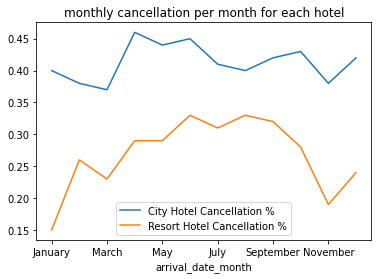

In [ ]:
monthly_cancellation_df.rename(columns={'0_x':'City Hotel Cancellation %','0_y':'Resort Hotel Cancellation %'},inplace=True)
ax=monthly_cancellation_df.plot(title='monthly cancellation per month for each hotel')

In [ ]:
#How many cancellations per month for not getting the same room in hotels
df1=df.iloc[:,[0,1,4,19,20,23]].rename(columns={'agent':'Bookings'})
df1=df1[df1['assigned_room_type']!=df['reserved_room_type']]
df1=df1.groupby(['arrival_date_month','hotel']).agg({'is_canceled':'sum','Bookings':'count'}).unstack()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1=df1.reindex(new_order, axis=0)
df1

is_canceled                Bookings             
hotel               City Hotel Resort Hotel City Hotel Resort Hotel
arrival_date_month                                                 
January                     11           31        250          840
February                    49           59        488          830
March                       33           46        617          795
April                       34           53        550          640
May                         53           26        595          618
June                        33           15        545          357
July                        30           22        563          506
August                      28           20        710          479
September                   36           24       1029          532
October                     48           24        917          740
November                    38           26        500          727
December                    25           38        428          661

In [ ]:
df2=df.iloc[:,[0,4,23]]
df2=df2.groupby(['arrival_date_month','hotel'])['agent'].size().unstack().reindex(new_order, axis=0)
df2

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,3736,2193
February,4965,3103
March,6458,3336
April,7480,3609
May,8232,3559
June,7894,3045
July,8088,4573
August,8983,4894
September,7400,3108


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
cancellation_on_not_getting_same_room_city_hotel_df=pd.DataFrame(round((df1['is_canceled','City Hotel']/df2['City Hotel'])*100,2))
cancellation_on_not_getting_same_room_resort_hotel_df=pd.DataFrame(round((df1['is_canceled','Resort Hotel']/df2['Resort Hotel'])*100,2))
cancellation_not_same_room=cancellation_on_not_getting_same_room_city_hotel_df.merge(cancellation_on_not_getting_same_room_resort_hotel_df,how='inner',on='arrival_date_month')
cancellation_sr=cancellation_not_same_room.rename(columns={'0_x':'Cancellation % on not getting same room in city hotel','0_y':'Cancellation % on not getting same room in resort hotel'})
df3=cancellation_sr

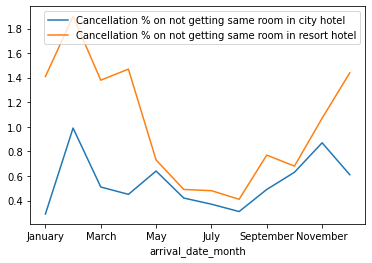

In [ ]:
df3.plot()